In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding, Dense, Dropout, Conv1D, GlobalAveragePooling1D,concatenate

In [ ]:
# 데이터 불러오기
train_file = '/content/drive/MyDrive/colab/dataset/chatbot_data.csv'
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

In [ ]:
# 단어 인덱스 시퀸스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]

tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequence = tokenizer.texts_to_sequences(corpus)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
MAX_SEQ_LEN = 15
padded_seqs = preprocessing.sequence.pad_sequences(sequence, maxlen=MAX_SEQ_LEN, padding='post')

In [ ]:

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features)) # 학습을 원할하게 하기 위한 셔플

In [ ]:
train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

In [ ]:
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)

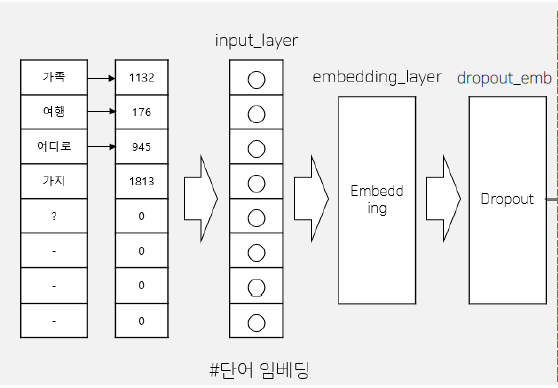

In [ ]:
# 하이퍼파라미터 기본값
dropout_prob = 0.5
EMB_SIZE  = 128
EPOCH = 10
VOCAB_SIZE = len(word_index) + 1

In [ ]:
# 입력 계층
input_layer = Input(shape =(MAX_SEQ_LEN,) )

embedding_layer = Embedding(VOCAB_SIZE,EMB_SIZE,input_length=MAX_SEQ_LEN)(input_layer)

dropout_emb = Dropout(rate = dropout_prob)(embedding_layer)


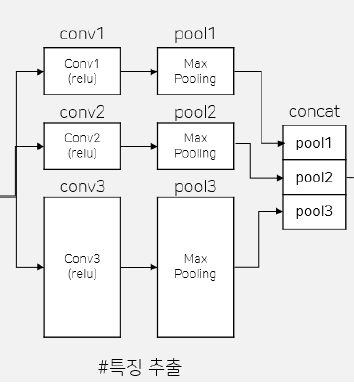

In [ ]:
conv1 = Conv1D(filters=128, kernel_size=3, padding='valid', activation=tf.nn.elu)(dropout_emb)
pool1 = GlobalAveragePooling1D()(conv1)
conv2 = Conv1D(filters=128, kernel_size=4, padding='valid', activation=tf.nn.elu)(dropout_emb)
pool2 = GlobalAveragePooling1D()(conv1)
conv3 = Conv1D(filters=128, kernel_size=5, padding='valid', activation=tf.nn.elu)(dropout_emb)
pool3 = GlobalAveragePooling1D()(conv1)


concat = concatenate([pool1,pool2,pool3])

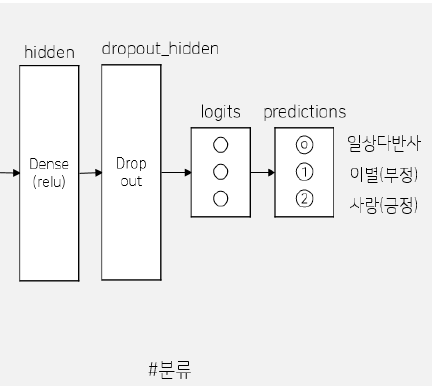

In [ ]:
hidden = Dense(128, activation=tf.nn.elu)(concat)
dropout_hidden = Dropout(rate = 0.92)(hidden)
logits = Dense(3, name = 'logits',)(dropout_hidden)
prediction = Dense(3, activation=tf.nn.softmax)(logits)

In [ ]:
model = Model(inputs = input_layer, outputs = prediction)
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs= EPOCH, verbose=1)

Epoch 1/10
414/414 [==============================] - 8s 17ms/step - loss: 0.0519 - accuracy: 0.9849 - val_loss: 0.0173 - val_accuracy: 0.9932
Epoch 2/10
414/414 [==============================] - 7s 17ms/step - loss: 0.0648 - accuracy: 0.9810 - val_loss: 0.0285 - val_accuracy: 0.9882
Epoch 3/10
414/414 [==============================] - 7s 17ms/step - loss: 0.0652 - accuracy: 0.9817 - val_loss: 0.0236 - val_accuracy: 0.9907
Epoch 4/10
414/414 [==============================] - 7s 17ms/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.0368 - val_accuracy: 0.9873
Epoch 5/10
414/414 [==============================] - 7s 17ms/step - loss: 0.0468 - accuracy: 0.9872 - val_loss: 0.0365 - val_accuracy: 0.9894
Epoch 6/10
414/414 [==============================] - 7s 17ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0329 - val_accuracy: 0.9911
Epoch 7/10
414/414 [==============================] - 7s 17ms/step - loss: 0.0634 - accuracy: 0.9791 - val_loss: 0.0233 - val_accuracy: 0.9924

In [ ]:
loss, accuracy = model.evaluate(test_ds, verbose = 1)
print("ACC : %f" % (accuracy * 100))
print('LOSS : %f' % (loss))

60/60 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9907
ACC : 99.069375
LOSS : 0.019603


In [ ]:
model = Model(inputs = input_layer, outputs = prediction)
model.compile(optimizer = 'adadelta', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs= EPOCH, verbose=1)

Epoch 1/10
414/414 [==============================] - 2s 5ms/step - loss: 0.0506 - accuracy: 0.9856 - val_loss: 0.0244 - val_accuracy: 0.9924
Epoch 2/10
414/414 [==============================] - 2s 4ms/step - loss: 0.0497 - accuracy: 0.9825 - val_loss: 0.0253 - val_accuracy: 0.9915
Epoch 3/10
414/414 [==============================] - 2s 4ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0253 - val_accuracy: 0.9886
Epoch 4/10
414/414 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9841 - val_loss: 0.0188 - val_accuracy: 0.9907
Epoch 5/10
414/414 [==============================] - 2s 4ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0299 - val_accuracy: 0.9886
Epoch 6/10
414/414 [==============================] - 2s 4ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.0230 - val_accuracy: 0.9886
Epoch 7/10
414/414 [==============================] - 2s 4ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0229 - val_accuracy: 0.9911
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_ds, verbose = 1)
print("ACC : %f" % (accuracy * 100))
print('LOSS : %f' % (loss))

60/60 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9907
ACC : 99.069375
LOSS : 0.024703


In [ ]:
model = Model(inputs = input_layer, outputs = prediction)
model.compile(optimizer = 'Nadam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs= EPOCH, verbose=1)

Epoch 1/10
414/414 [==============================] - 7s 14ms/step - loss: 0.0387 - accuracy: 0.9864 - val_loss: 0.0170 - val_accuracy: 0.9937
Epoch 2/10
414/414 [==============================] - 5s 13ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 0.0226 - val_accuracy: 0.9924
Epoch 3/10
414/414 [==============================] - 5s 13ms/step - loss: 0.0576 - accuracy: 0.9840 - val_loss: 0.0204 - val_accuracy: 0.9911
Epoch 4/10
414/414 [==============================] - 6s 13ms/step - loss: 0.0559 - accuracy: 0.9831 - val_loss: 0.0224 - val_accuracy: 0.9903
Epoch 5/10
414/414 [==============================] - 5s 13ms/step - loss: 0.0376 - accuracy: 0.9899 - val_loss: 0.0144 - val_accuracy: 0.9937
Epoch 6/10
414/414 [==============================] - 5s 13ms/step - loss: 0.0337 - accuracy: 0.9903 - val_loss: 0.0166 - val_accuracy: 0.9937
Epoch 7/10
414/414 [==============================] - 6s 14ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0161 - val_accuracy: 0.9924

In [ ]:
loss, accuracy = model.evaluate(test_ds, verbose = 1)
print("ACC : %f" % (accuracy * 100))
print('LOSS : %f' % (loss))

60/60 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9890
ACC : 98.900169
LOSS : 0.022070


In [ ]:
model.save('cnn_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
new_model = load_model('/content/cnn_model.h5')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 15, 128)      1715072     input_2[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 15, 128)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 13, 128)      49280       dropout[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.evaluate(test_ds,verbose=2)

60/60 - 0s - loss: 0.0071 - accuracy: 0.9966


[0.0070824590511620045, 0.9966158866882324]